<a href="https://colab.research.google.com/github/Jorgecuenca1/trabajo-vision-computadora-ii/blob/main/resnet_con_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Carga de datos (Asumiendo que tu estructura de directorios está bien configurada)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   # Aquí puedes agregar más argumentos para data augmentation si lo deseas
                                   )
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',  # directorio de entrenamiento
    target_size=(224, 224),  # Todas las imágenes serán redimensionadas a 224x224
    batch_size=32,
    class_mode='binary')  # Ya que sólo tenemos dos clases, usamos 'binary'



Found 5997 images belonging to 5 classes.


In [3]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',  # directorio de validación
    target_size=(224, 224),  # Todas las imágenes serán redimensionadas a 224x224
    batch_size=32,
    class_mode='binary')  # Ya que sólo tenemos dos clases, usamos 'binary'

# Creación del modelo
model = tf.keras.Sequential([
    ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Entrenamiento del modelo



Found 1255 images belonging to 5 classes.


In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=1,  # Ajusta según tus necesidades
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)


187/187 [==============================] - 5114s 27s/step - loss: -683.9080 - accuracy: 0.2270 - val_loss: -45965.8516 - val_accuracy: 0.1186


Loss History: [-683.9080200195312]
Validation Loss History: [-45965.8515625]
Accuracy History: [0.22699077427387238]
Validation Accuracy History: [0.11858974397182465]


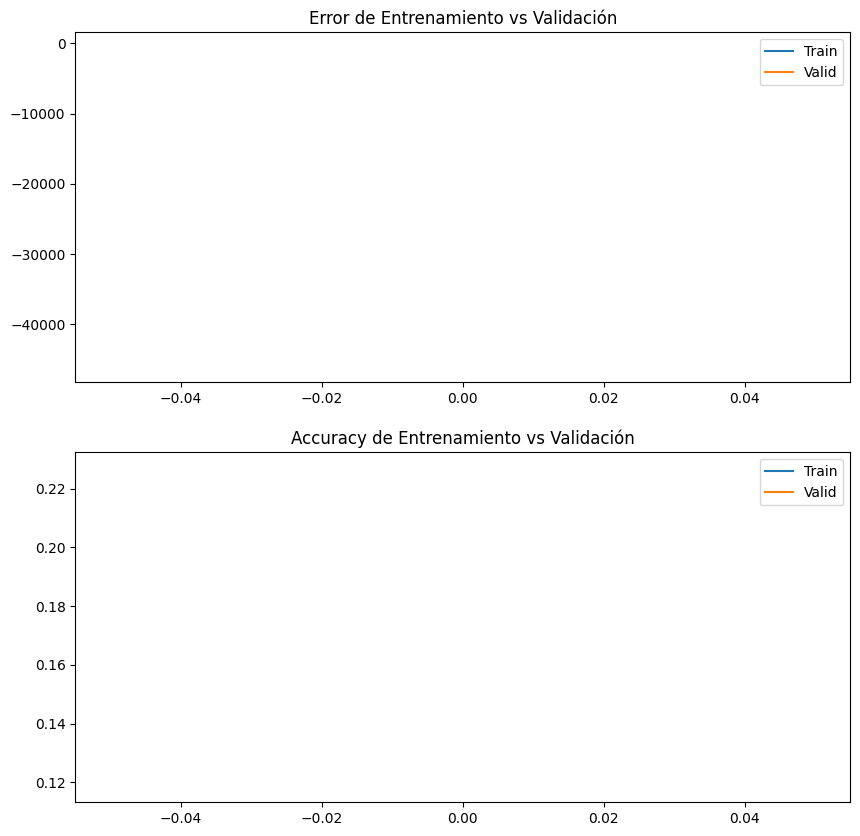

In [13]:
# Visualización de los resultados
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Verificamos que history tiene los datos que esperamos
print("Loss History:", history.history["loss"])
print("Validation Loss History:", history.history["val_loss"])
print("Accuracy History:", history.history["accuracy"])
print("Validation Accuracy History:", history.history["val_accuracy"])

axs[0].plot(history.history["loss"], label='Train')
axs[0].plot(history.history["val_loss"], label='Valid')
axs[0].set_title('Error de Entrenamiento vs Validación')
axs[0].legend()

axs[1].plot(history.history["accuracy"], label='Train')
axs[1].plot(history.history["val_accuracy"], label='Valid')
axs[1].set_title('Accuracy de Entrenamiento vs Validación')
axs[1].legend()

# Mostramos las gráficas
plt.show()



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
